# (Prosper Loan Data)
## by (Rania Alzahrani)

## Preliminary Wrangling

This data set contains 113,937 loans with 81 variables on each
loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.shape

(113937, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
df.CreditGrade.unique()

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [6]:
new = ['ListingNumber','LoanOriginalAmount','BorrowerState','Occupation','BorrowerAPR','StatedMonthlyIncome', 'ProsperRating (Alpha)', 
        'Term','EmploymentStatus','TotalInquiries','MonthlyLoanPayment','Investors']
df_new = df[new]

In [7]:
df_new.head()

,ListingNumber,LoanOriginalAmount,BorrowerState,Occupation,BorrowerAPR,StatedMonthlyIncome,ProsperRating (Alpha),Term,EmploymentStatus,TotalInquiries,MonthlyLoanPayment,Investors
0,193129,9425,CO,Other,0.16516,3083.333333,NaN,36,Self-employed,3.0,330.43,258
1,1209647,10000,CO,Professional,0.12016,6125.000000,A,36,Employed,5.0,318.93,1
2,81716,3001,GA,Other,0.28269,2083.333333,NaN,36,Not available,1.0,123.32,41
3,658116,10000,GA,Skilled Labor,0.12528,2875.000000,A,36,Employed,1.0,321.45,158
4,909464,15000,MN,Executive,0.24614,9583.333333,D,36,Employed,9.0,563.97,20


### What is the structure of your dataset?

The dataset has 113937 rows and 81 colmns
### What is/are the main feature(s) of interest in your dataset?

The Borrower's APR 
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

stated monthly income, employment status, ProsperRating (Alpha) 

## Univariate Exploration



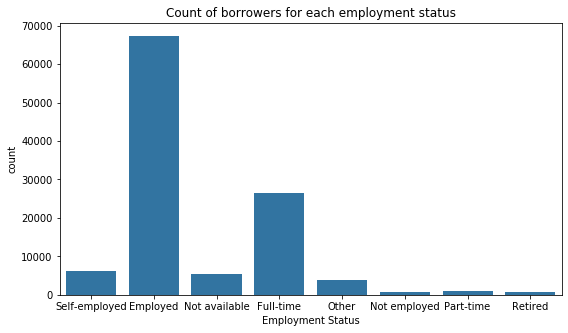

In [8]:
fig, ax = plt.subplots(figsize = [9,5])
sb.countplot(data=df_new, x='EmploymentStatus', color=sb.color_palette()[0]);
plt.xlabel('Employment Status')
plt.title('Count of borrowers for each employment status');

Most of the borrowers are employed and the least are not employed, now I'm gonna see the ARP 

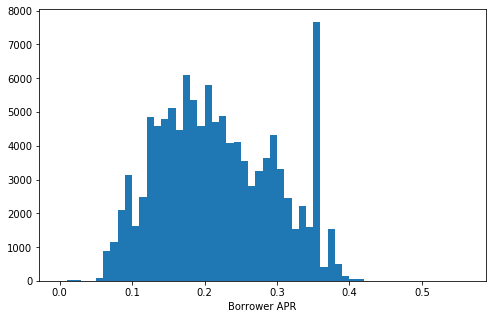

In [9]:
bins = np.arange(0, df_new.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df_new, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');

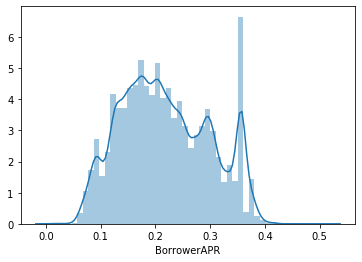

In [10]:
sb.distplot(df_new['BorrowerAPR'])

In [14]:
df_new.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

In [16]:
def arrange(row):
    if row['BorrowerAPR']<0.156290:
        return 'Low'
    if row['BorrowerAPR']<0.283810:
        return 'Medium'
    else:
        return 'High'

In [17]:
df_new['ARP_range'] = df_new.apply(arrange, axis=1);

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


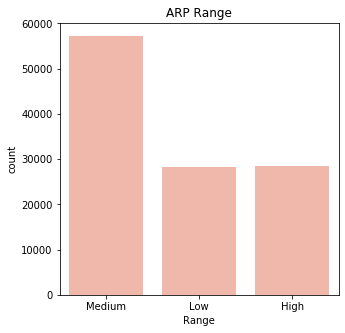

In [79]:
fig, ax = plt.subplots(figsize = [5,5])
sb.countplot(data=df_new, x='ARP_range', color=('#fab1a0'));
plt.xlabel('Range')
plt.title('ARP Range');

The distribution looks mostly right skewed next I will see the borrower state and from the range we could see that the most ARB are medium

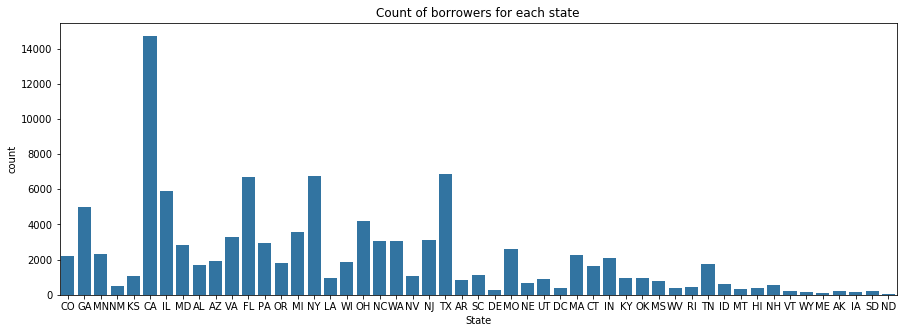

In [11]:
fig, ax = plt.subplots(figsize = [15,5])
sb.countplot(data=df_new, x='BorrowerState', color=sb.color_palette()[0]);
plt.xlabel('State')
plt.title('Count of borrowers for each state');

We can see from the bar chart that the majority are from CA. next I will see the monthly income

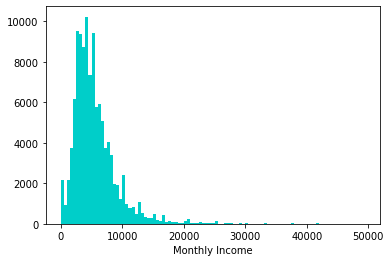

In [78]:
bins1 = np.arange(0, 50000, 500)
plt.hist(data = df_new, x = 'StatedMonthlyIncome', color=('#00cec9'), bins=bins1);
plt.xlabel('Monthly Income');

We could see from here that the distribution is right skewed

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

After applying two visual for the  borrower ARP it looks like the disturibution is right sekwed, the Count of borrowers for each employment status shows that most borrower are from CA state. the monthly income also right sekewd 
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The borrowe ARP dosen't look exactly reight sekewd. I haven added more coulnm for ARP to know the range. 

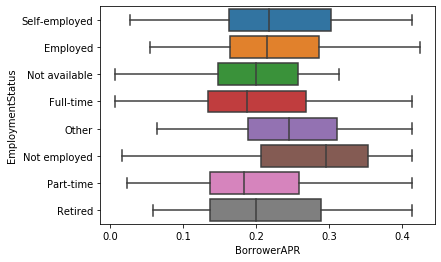

In [22]:
sb.boxplot(data = df_new, y='EmploymentStatus',x = 'BorrowerAPR')

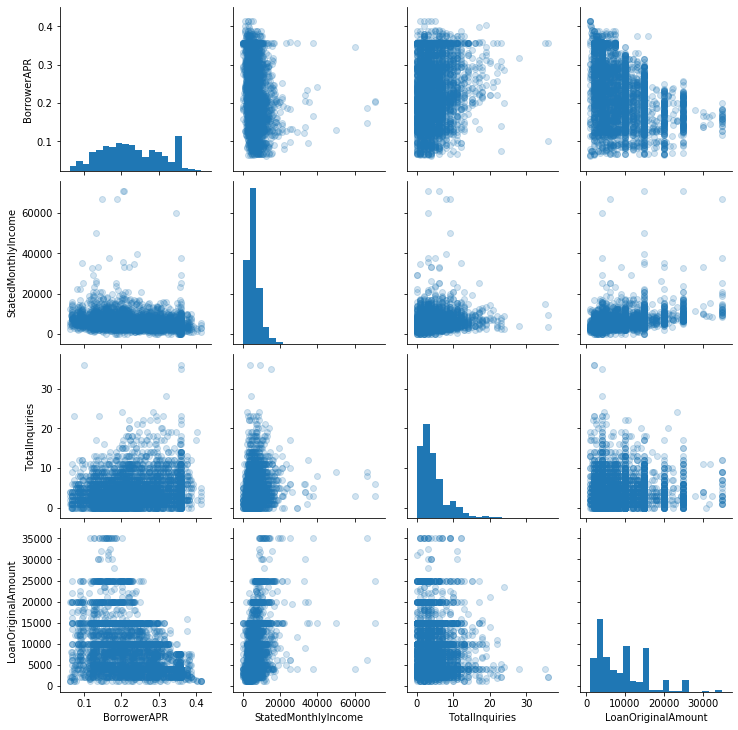

In [37]:
var = ['BorrowerAPR', 
         'StatedMonthlyIncome', 'TotalInquiries', 'LoanOriginalAmount']

df_new_samp = df_new.sample(5000)
g = sb.PairGrid(data = df_new_samp.dropna(), vars = var)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

The correlation coefficient of BorrowerAPR, StatedMonthlyIncome, TotalInquiries, LoanOriginalAmount associated with one another, the loan original amount and the borrower ARP are negatively correlated.  

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

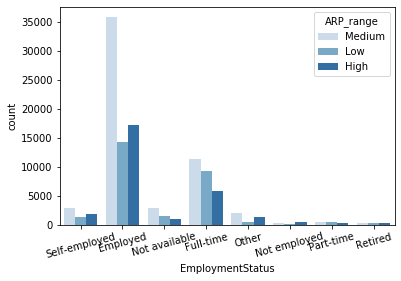

In [44]:
sb.countplot(data = df_new, x = 'EmploymentStatus', hue = 'ARP_range', palette = 'Blues')
plt.xticks(rotation=15)

For all of the emplyment status we could see it is associated with medium ARP except for not emploeyed 

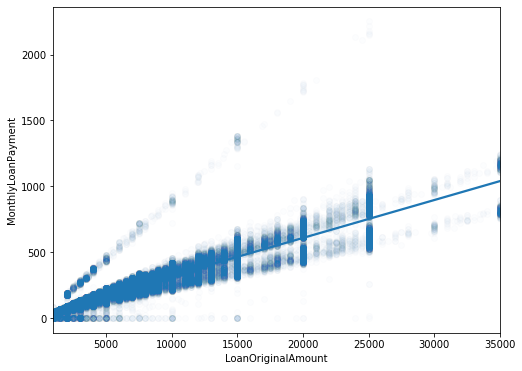

In [46]:
plt.figure(figsize = [8, 6])
sb.regplot(data = df_new, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', scatter_kws={'alpha':0.01});

Clearly the plot shows that the more loan original amount, the more monthly loan payment 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Most of the emloyment status associated with medium ARP, The loan original amount and the monthly loan payment have positive relationship 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The StatedMonthlyIncome is negatively associated with loan original amount

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

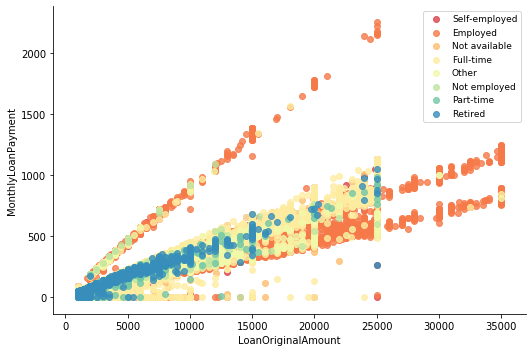

In [61]:
a = sb.FacetGrid(data = df_new, hue = 'EmploymentStatus', height = 5, aspect = 1.5, palette="Spectral")
a.map(sb.regplot,"LoanOriginalAmount", "MonthlyLoanPayment", fit_reg = False);
plt.legend(loc=1, fontsize = 9)

From this plot we could see the relationship between loan original amount and the monthly loan payment associated with employment status. as we see that the heigher the monthly loan payment and loan original amount associated more with employed and self-employed

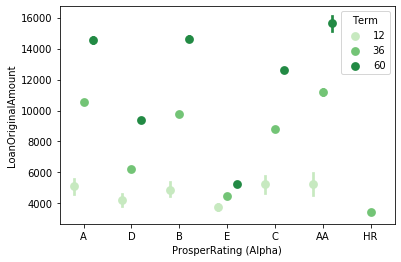

In [73]:
sb.pointplot(data = df_new, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4)

looks like the realtionship between the rating and the term based on the loan original amount is positive. 

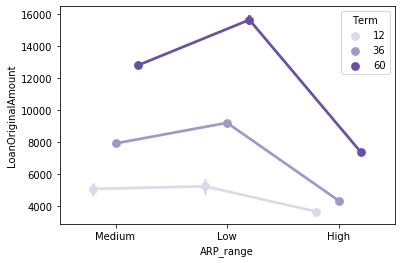

In [76]:
sb.pointplot(data = df_new, x = 'ARP_range', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Purples', dodge = 0.4)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

From the relationship between the original loan amount and the monthly loan payment we can observe that more original loan and monthly payment haighly associated with employed and self-employed. Also, from the second plot we see that the term increas if the loan amount increase with better rating 
### Were there any interesting or surprising interactions between features?

No